In [1]:
import pandas as pd
import lxml.html
import requests

### 데이터 불러오기

In [2]:
res = requests.get('http://ncov.mohw.go.kr/tcmBoardView.do?brdId=&brdGubun=&dataGubun=&ncvContSeq=354238&contSeq=354238&board_id=&gubun=ALL')

In [3]:
root = lxml.html.fromstring(res.text)

In [4]:
content = root.cssselect('div.bv_content')[0].text_content()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [6]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [7]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[ 2,  1,  2,  1,  1,  9,  2, 13,  1,  1,  1,  1,  3,  1,  4,  1,
         1,  4,  1,  1,  3,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  4,
         2,  1,  1,  3,  1,  1,  4,  1,  3,  7,  1,  3,  1,  1,  1,  1,
         2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,  1,  1,  1,
         1,  1,  1,  2,  6,  1,  2,  1,  3,  1,  2,  1,  2,  1,  1,  3,
         1,  3,  1,  2,  1,  1,  2,  1,  1,  2,  1,  2,  5,  2,  3,  1,
         2,  1,  3,  3,  4,  1,  1,  2,  1,  3,  1,  1,  2,  2,  1,  1,
         1,  1,  7,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,
         1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
         2,  3,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  2,  3,
         2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  1,
         2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,
         1,  3,  3,  3,  1,  1,  1,  3,  1,  4,  1,  3,  2,  1,  2,  1,
         1,  1,  1,  1,  1,  1,  1,  1, 33,  2,  1,  1,  1,  2, 

In [8]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [9]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
216,관련,33
7,10,13
545,코로나19,10
5,0시,9
590,확진자,7
41,18,7
578,현황,7
114,4월,7
234,기준,6
68,27일,6


In [10]:

from wordcloud import WordCloud

In [11]:
#wc = WordCloud(width=400, height=400, background_color='white')
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.ttf', width=400, height=400, max_font_size=150, background_color='lightyellow', colormap = 'Accent_r')
# 한글 파일일 경우 폰트 지정할 것.

In [12]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

In [13]:

wc.fit_words(frequencies)

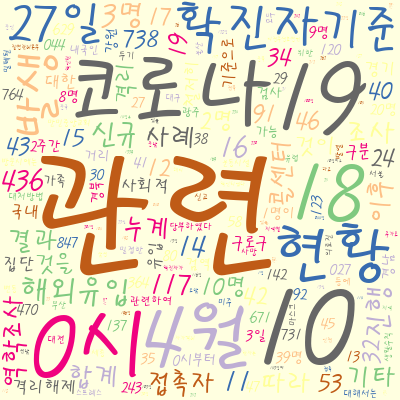

In [14]:
wc.to_image()

In [29]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [31]:
browser = webdriver.Chrome('chromedriver.exe')
browser.get("http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=11&ncvContSeq=&contSeq=&board_id=&gubun=")
 
result_html = browser.page_source
result_soup = BeautifulSoup(result_html, 'html.parser')
tags = result_soup.find_all("div", attrs={"class":"data_table"})[-1]
Time = result_soup.find_all("span", attrs={"class":"title_info"})[0]

In [32]:
!pip install html_table_parser

  Created wheel for html-table-parser: filename=html_table_parser-0.1.0-py3-none-any.whl size=4652 sha256=29daa5b1ade2cf387b6dbee3dc36a18953b2e2d68d7724eb7db72631673916ce
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\8b\db\ba\ffbb0a5dcb78fd955a33d26295a77ced593e712a7d8a4a0dc6
Successfully built html-table-parser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


In [34]:
from html_table_parser import parser_functions as parser
html_table = parser.make2d(tags)

In [35]:

df=pd.DataFrame(html_table[1:], columns=html_table[0])

In [36]:
df

,구분,확진자(%),사망자(%),치명률(%)
0,80 이상,485 (4.52),116 (47.74),23.92
1,70-79,708 (6.59),72 (29.63),10.17
2,60-69,"1,347 (12.54)",35 (14.40),2.6
3,50-59,"1,953 (18.19)",15 (6.17),0.77
4,40-49,"1,422 (13.24)",3 (1.23),0.21
5,30-39,"1,152 (10.73)",2 (0.82),0.17
6,20-29,"2,943 (27.41)",0 (0.00),-
7,10-19,588 (5.48),0 (0.00),-
8,0-9,140 (1.3),0 (0.00),-


In [37]:
for i in range(9):
    df['확진자(%)'][i] = df['확진자(%)'][i].split('\xa0')[0].replace(',','')
    df['사망자(%)'][i] = df['사망자(%)'][i].split('\xa0')[0].replace(',','')

In [38]:
import matplotlib.pyplot as plt

### 나이별 확진자 

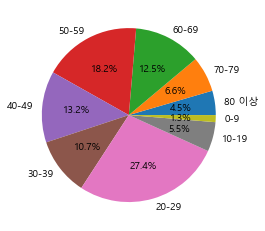

In [46]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['확진자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()

## 나이 별 사망자

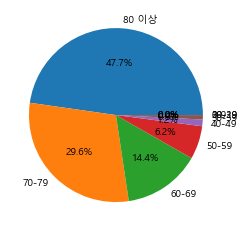

In [45]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['사망자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()